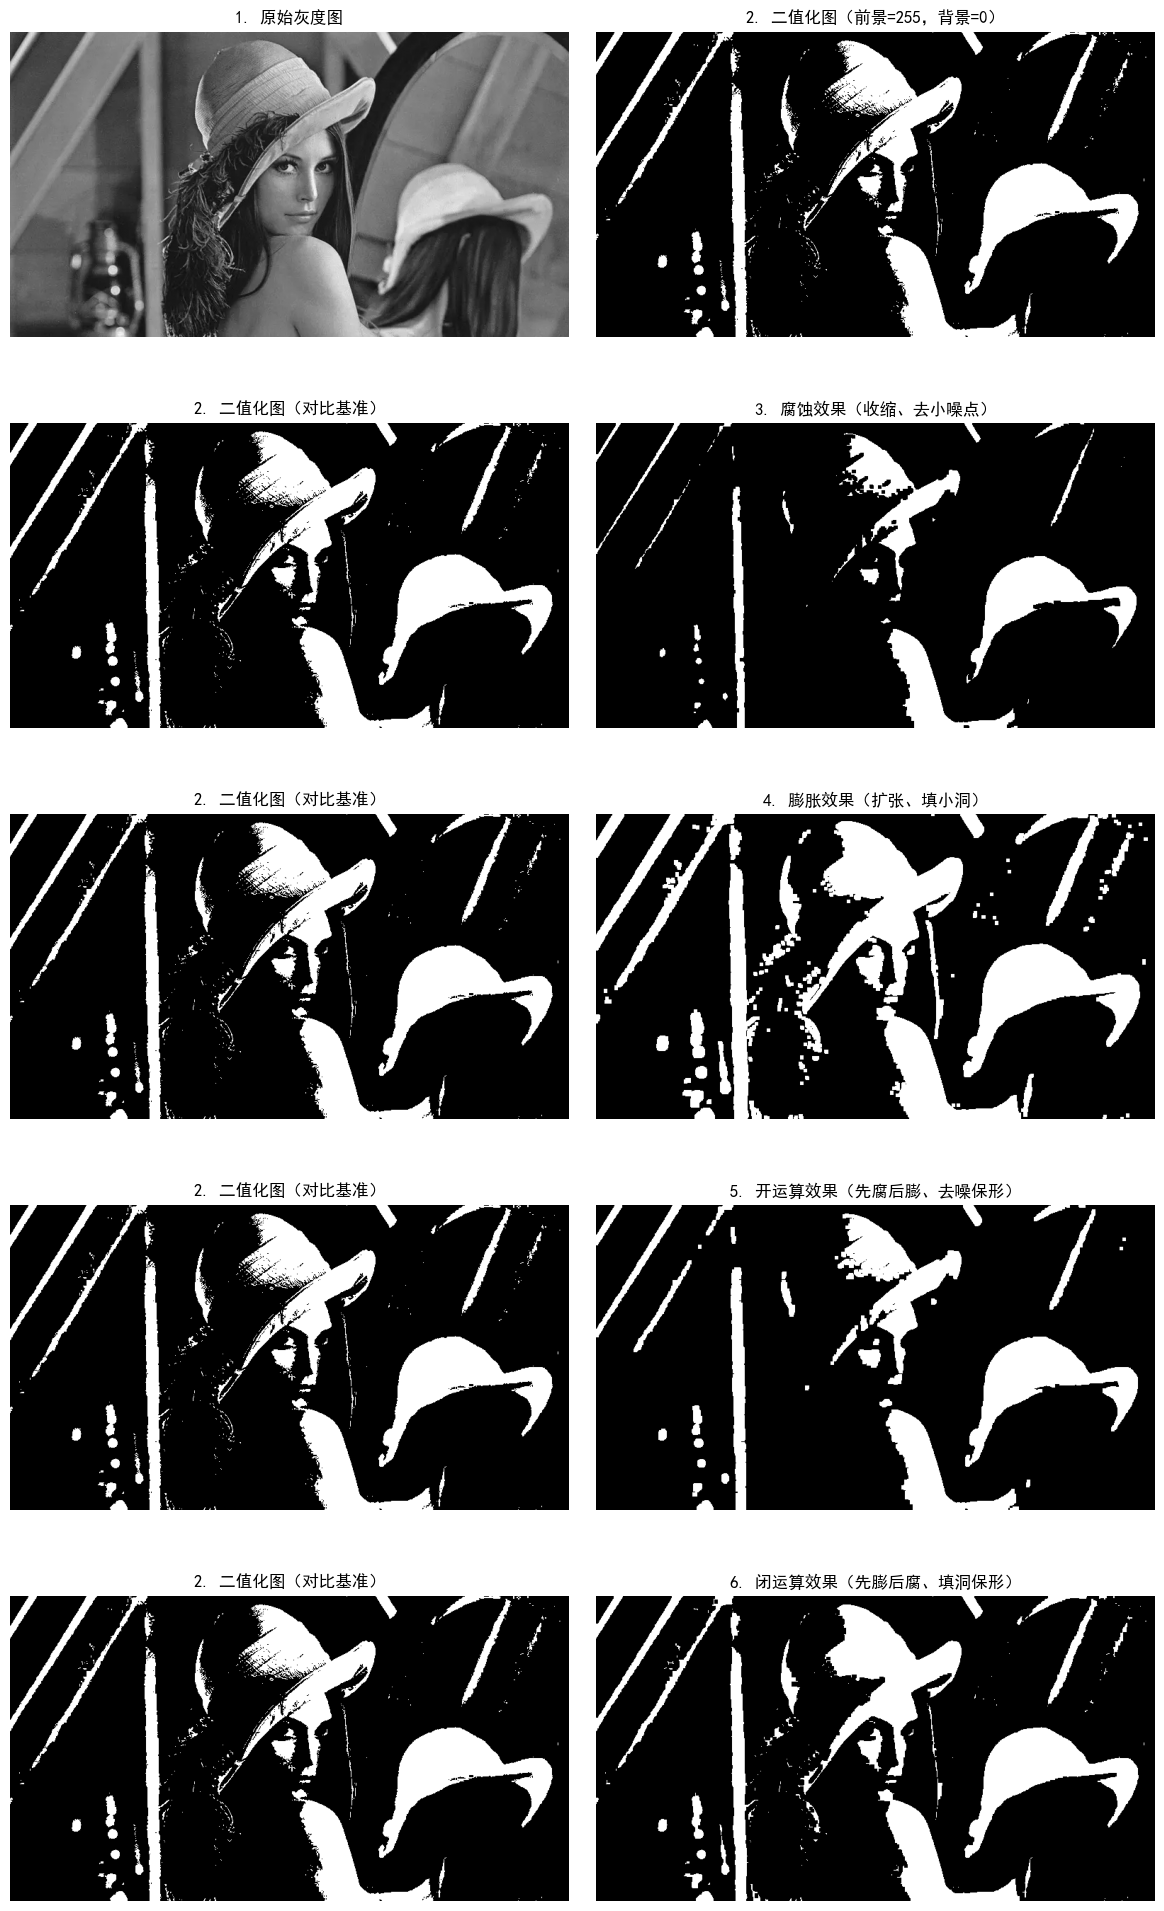

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 图像读取与预处理
img = cv2.imread("lena.jpeg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("⚠️  图片读取失败！使用随机生成的二值图进行演示")
    img = np.zeros((200, 200), dtype=np.uint8)
    cv2.rectangle(img, (50, 50), (150, 150), 255, -1)
    for _ in range(20):
        x, y = np.random.randint(0, 200, 2)
        cv2.circle(img, (x, y), 1, 255, -1)
    for _ in range(10):
        x, y = np.random.randint(60, 140, 2)
        cv2.circle(img, (x, y), 1, 0, -1)
    binary_img = img
else:
    ret, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 构造结构元素
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

kernel = kernel_rect

# 四大形态学算子实现
erode_img = cv2.erode(binary_img, kernel, iterations=1)
dilate_img = cv2.dilate(binary_img, kernel, iterations=1)
opening_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel, iterations=1)
closing_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel, iterations=1)

# 结果可视化
plt.figure(figsize=(12, 20))

# 第1行：原始灰度图 + 二值图
plt.subplot(5, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("1. 原始灰度图")
plt.axis("off")

plt.subplot(5, 2, 2)
plt.imshow(binary_img, cmap="gray")
plt.title("2. 二值化图（前景=255，背景=0）")
plt.axis("off")

# 第2行：二值图 + 腐蚀效果
plt.subplot(5, 2, 3)
plt.imshow(binary_img, cmap="gray")
plt.title("2. 二值化图（对比基准）")
plt.axis("off")

plt.subplot(5, 2, 4)
plt.imshow(erode_img, cmap="gray")
plt.title("3. 腐蚀效果（收缩、去小噪点）")
plt.axis("off")

# 第3行：二值图 + 膨胀效果
plt.subplot(5, 2, 5)
plt.imshow(binary_img, cmap="gray")
plt.title("2. 二值化图（对比基准）")
plt.axis("off")

plt.subplot(5, 2, 6)
plt.imshow(dilate_img, cmap="gray")
plt.title("4. 膨胀效果（扩张、填小洞）")
plt.axis("off")

# 第4行：二值图 + 开运算效果
plt.subplot(5, 2, 7)
plt.imshow(binary_img, cmap="gray")
plt.title("2. 二值化图（对比基准）")
plt.axis("off")

plt.subplot(5, 2, 8)
plt.imshow(opening_img, cmap="gray")
plt.title("5. 开运算效果（先腐后膨、去噪保形）")
plt.axis("off")

# 第5行：二值图 + 闭运算效果
plt.subplot(5, 2, 9)
plt.imshow(binary_img, cmap="gray")
plt.title("2. 二值化图（对比基准）")
plt.axis("off")

plt.subplot(5, 2, 10)
plt.imshow(closing_img, cmap="gray")
plt.title("6. 闭运算效果（先膨后腐、填洞保形）")
plt.axis("off")

plt.tight_layout(pad=2.0)
plt.show()